___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.graph_objects as go
import scipy.stats as stats
%matplotlib inline
import datetime as dt
from datetime import datetime

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, PowerTransformer, LabelEncoder 
from sklearn.svm import SVR, SVC
from sklearn.tree import plot_tree, DecisionTreeClassifier, DecisionTreeRegressor
from yellowbrick.classifier import ClassificationReport

from xgboost import XGBRegressor, XGBClassifier, plot_importance

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
data = pd.read_csv("creditcard.csv")
df = data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


### Exploratory Data Analysis

In [3]:
df.shape  

(284807, 31)

In [4]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,-0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,-0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [6]:
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000,284807.000,284807.000
mean,94813.860,88.350,0.002
std,47488.146,250.120,0.042
min,0.000,0.000,0.000
25%,54201.500,5.600,0.000
50%,84692.000,22.000,0.000
75%,139320.500,77.165,0.000
max,172792.000,25691.160,1.000


In [7]:
df.duplicated().sum()

1081

In [8]:
df.drop_duplicates(inplace=True)

**Class Analysis**

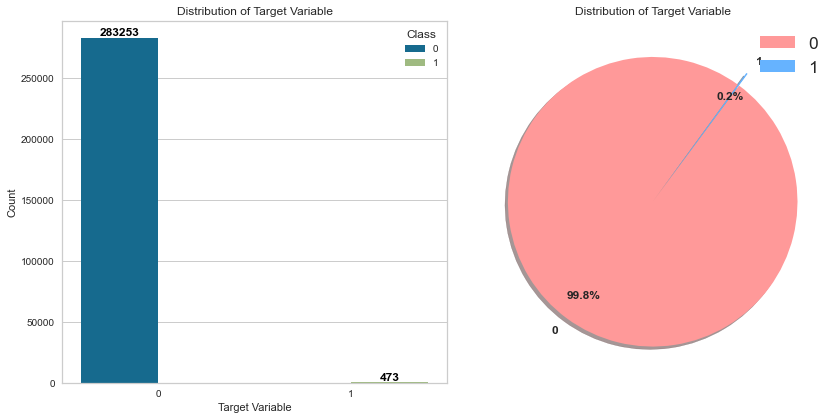

In [9]:
# with seaborn
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ax = sns.countplot(x='Class', data=df,hue='Class')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')


plt.subplot(1,2,2)
labels = ['Class 0', 'Class 1']
plt.pie(df.Class.value_counts(), labels = df.Class.value_counts().index, autopct = '%1.1f%%', startangle = 54, explode = (0, 0.1), colors = ['#ff9999', '#66b3ff'], shadow = True, textprops = {'fontsize': 12, 'fontweight': 'bold'}, pctdistance = 0.8, labeldistance = 1.1)
plt.title('Distribution of Target Variable')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.tight_layout()
plt.show()

In [10]:
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Fraud']
values = df['Class'].value_counts()
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.2)])
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
    height=400,
    width=600,
)
fig.show()

**Dataset is imbalanced**

In [11]:
fraud = len(df[df['Class']==1])
non_fraud = len(df[df['Class']==0])
fraud_percent =  (fraud/(fraud+non_fraud))*100
print('Number of Fraud transaction: ', fraud)
print('Number of non-Fraud transaction: ', non_fraud)
print('Percentage of Fraud transaction: ', np.round(fraud_percent, decimals=3))

Number of Fraud transaction:  473
Number of non-Fraud transaction:  283253
Percentage of Fraud transaction:  0.167


In [12]:
nonfraud = df[df.Class==0]
fraud = df[df.Class==1]

print("Amount stats for non fraud class")
print(nonfraud.Amount.describe())

print("\nAmount stats for fraud class")
print(fraud.Amount.describe())

Amount stats for non fraud class
count   283253.000
mean        88.414
std        250.379
min          0.000
25%          5.670
50%         22.000
75%         77.460
max      25691.160
Name: Amount, dtype: float64

Amount stats for fraud class
count    473.000
mean     123.872
std      260.211
min        0.000
25%        1.000
50%        9.820
75%      105.890
max     2125.870
Name: Amount, dtype: float64


In [13]:
print("Total Amount: ", np.round(df.Amount.sum(), decimals=2))
print("Fraud Amount: ", np.round(fraud.Amount.sum(), decimals=2))
print("Non-Fraud Amount: ", np.round(nonfraud.Amount.sum(), decimals=2))
print("Percentage of Fraud Amount: ", np.round((fraud.Amount.sum()/df.Amount.sum())*100, decimals=2))

my_dict ={'Total_Amount': np.round(df.Amount.sum(), decimals=2),
          'Fraud_Amount': np.round(fraud.Amount.sum(), decimals=2),
          'Non-Fraud_Amount': np.round(nonfraud.Amount.sum(), decimals=2),
          'Percentage of Fraud Amount': np.round((fraud.Amount.sum()/df.Amount.sum())*100, decimals=2)
          }
df_amount = pd.DataFrame(my_dict, index=[0])    


Total Amount:  25102001.68
Fraud Amount:  58591.39
Non-Fraud Amount:  25043410.29
Percentage of Fraud Amount:  0.23


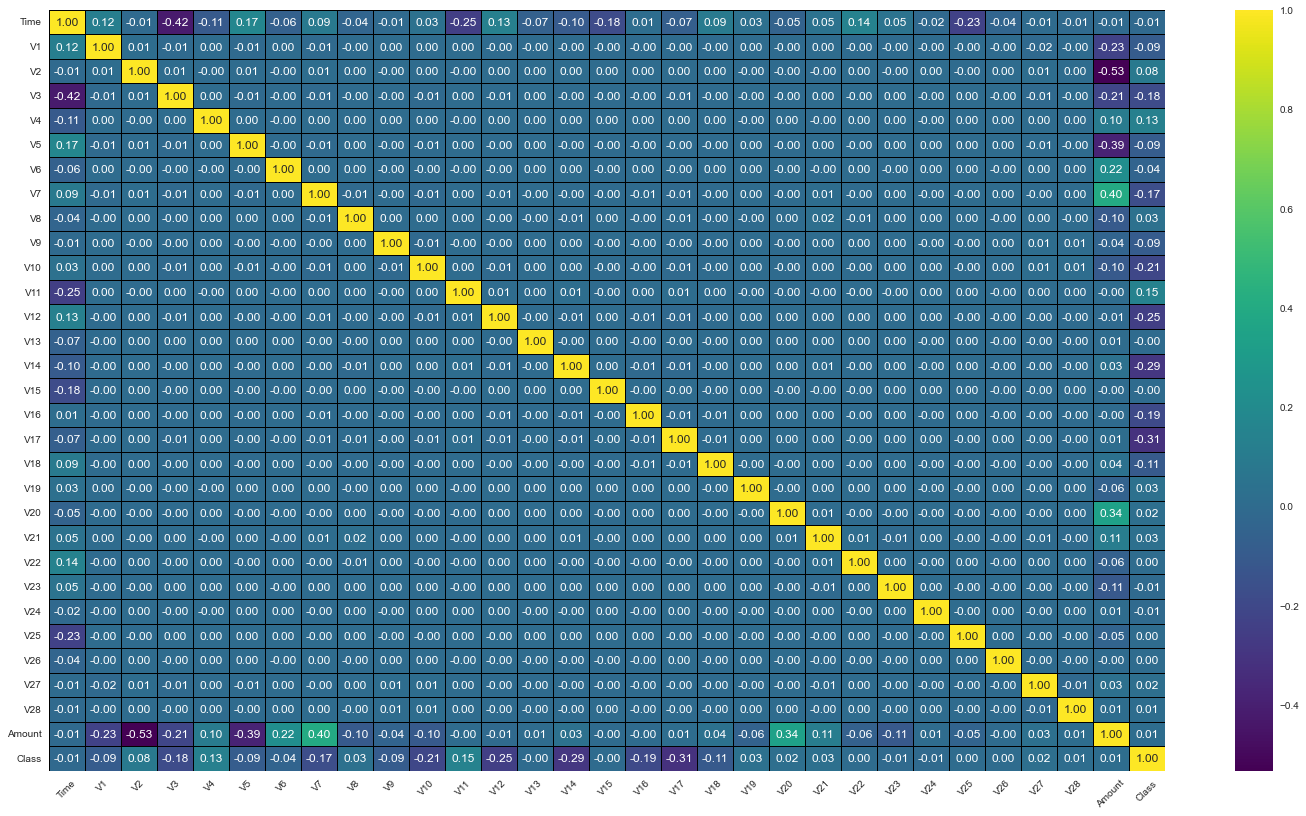

In [14]:
plt.figure(figsize = (25, 14))
sns.heatmap (df.corr(), annot = True, fmt = '.2f', linewidths=1, linecolor="black", cmap="viridis")
plt.xticks(rotation = 45);

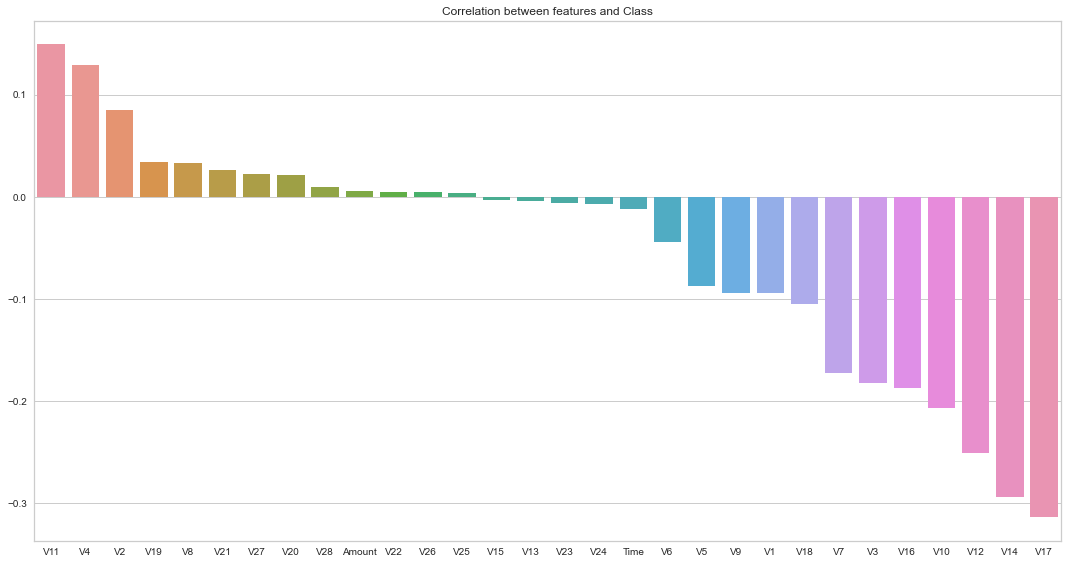

In [19]:
plt.figure(figsize=(15,8))           # Correlation Bar features with Class
ax = sns.barplot(x=df.corr()["Class"].drop(["Class"]).sort_values(ascending=False).index, y=df.corr()["Class"].drop(["Class"]).sort_values(ascending=False).values)
plt.title('Correlation between features and Class')
plt.tight_layout()
plt.show()

Highly Correlated Features are negatives V17, V14, V12, V10 and positives V11, V4, V2, V19

<AxesSubplot:xlabel='V10', ylabel='Density'>

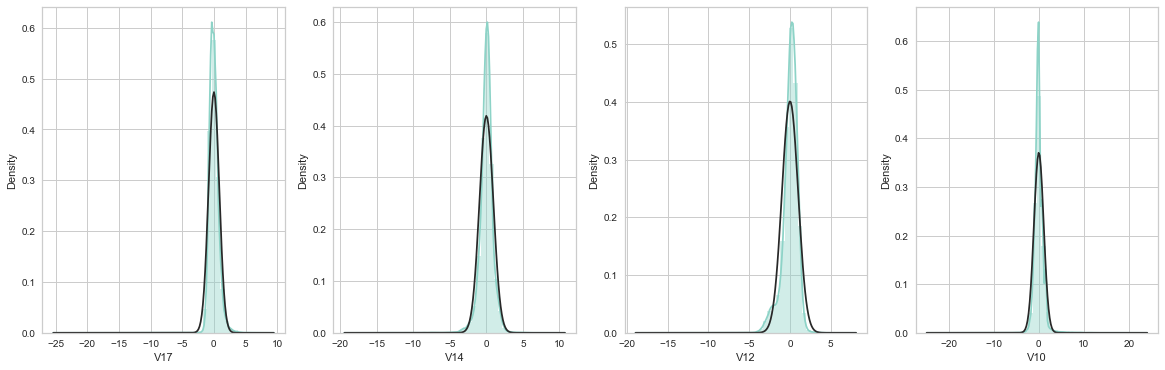

In [302]:
from scipy.stats import norm

sns.set_palette("Set3")
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))
sns.distplot(df['V17'],ax=ax1, fit=norm )
sns.distplot(df['V14'],ax=ax2, fit=norm)
sns.distplot(df['V12'],ax=ax3, fit=norm)
sns.distplot(df['V10'],ax=ax4, fit=norm)

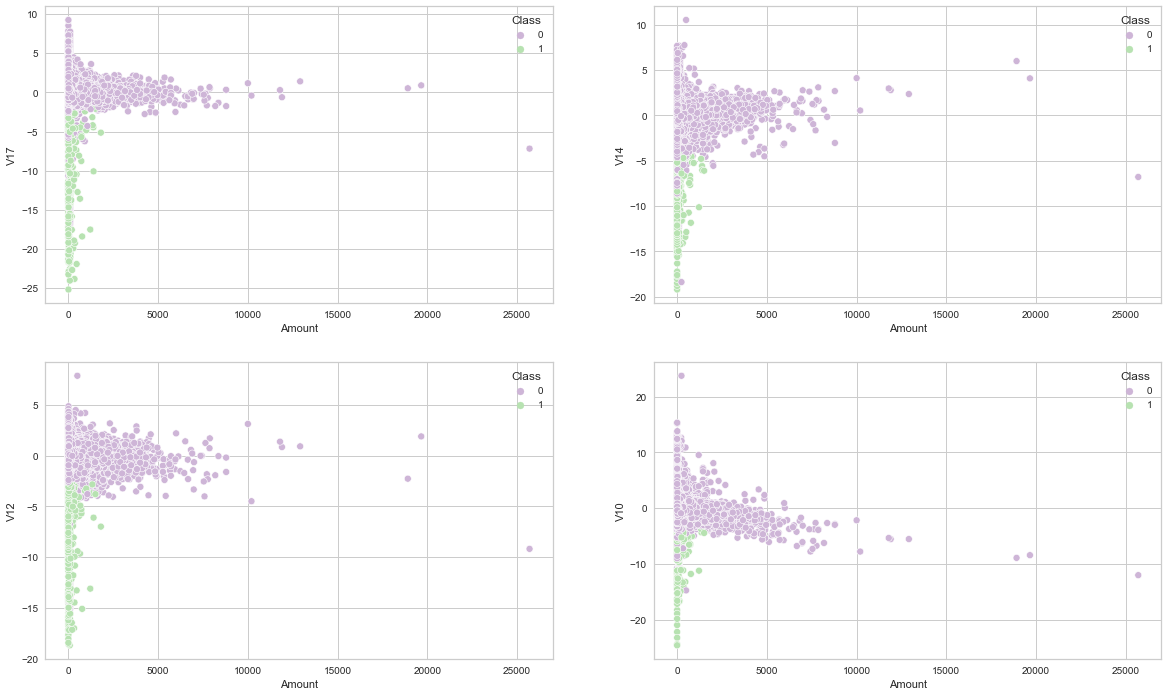

In [20]:
f, ax = plt.subplots(2,2, figsize=(20,12))
sns.scatterplot(data = df, x ='Amount', y = 'V17', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V14', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V12', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V10', hue = 'Class',  ax=ax[1,1], palette='PRGn');

<AxesSubplot:xlabel='V19', ylabel='Density'>

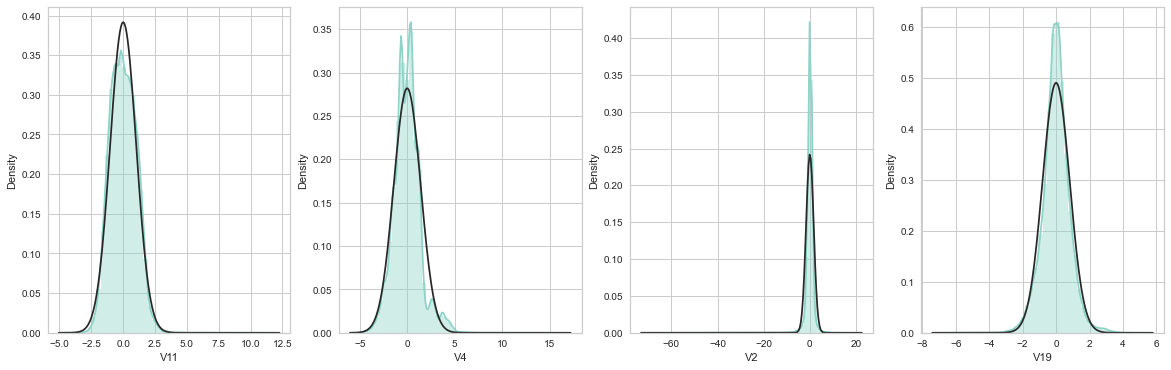

In [303]:
from scipy.stats import norm

sns.set_palette("Set3")
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))
sns.distplot(df['V11'],ax=ax1, fit=norm )
sns.distplot(df['V4'],ax=ax2, fit=norm)
sns.distplot(df['V2'],ax=ax3, fit=norm)
sns.distplot(df['V19'],ax=ax4, fit=norm)


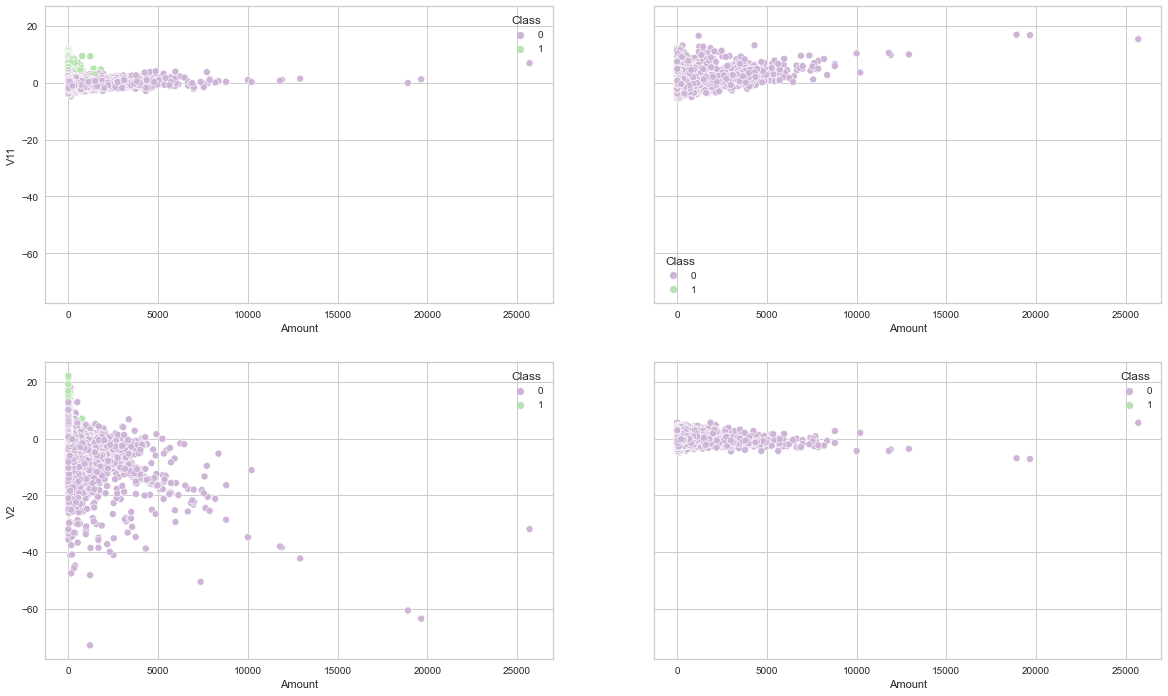

In [25]:
f, ax = plt.subplots(2,2, figsize=(20,12), sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V11', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V4', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V2', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V19', hue = 'Class',  ax=ax[1,1], palette='PRGn');

In [ ]:
new_df = df[["V17","V14","V12","V10","V11","V4","V19","Amount", "Class"]]
new_df

,V17,V14,V12,V10,V11,V4,V19,Amount,Class
0,0.208,-0.311,-0.618,0.091,-0.552,1.378,0.404,149.620,0
1,-0.115,-0.144,1.065,-0.167,1.613,0.448,-0.146,2.690,0
2,1.110,-0.166,0.066,0.208,0.625,0.380,-2.262,378.660,0
3,-0.684,-0.288,0.178,-0.055,-0.226,-0.863,-1.233,123.500,0
4,-0.237,-1.120,0.538,0.753,-0.823,0.403,0.803,69.990,0
...,...,...,...,...,...,...,...,...,...
284802,1.992,4.627,2.712,4.356,-1.593,-2.067,-0.683,0.770,0
284803,-0.026,-0.675,0.916,-0.976,-0.150,-0.739,-1.546,24.790,0
284804,0.314,-0.511,0.063,-0.485,0.412,-0.558,-0.577,67.880,0
284805,0.510,0.450,-0.963,-0.399,-1.934,0.690,2.898,10.000,0


### Data Cleaning
Check Missing Values and Outliers

In [ ]:
df.drop('Time',axis = 1, inplace = True)

In [ ]:
total = new_df.isnull().sum().sort_values(ascending = False)
percent = (new_df.isnull().sum()/new_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,V17,V14,V12,V10,V11,V4,V19,Amount,Class
Total,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Percent,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
# Libraries for Style
from colorama import Fore, Style
from termcolor import colored, cprint

In [ ]:
# OUTLIERS

iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in new_df.iloc[:, [0,1,3]].columns:
    
        IQR = new_df[col].quantile(0.75) - new_df[col].quantile(0.25)
        lower_lim = new_df[col].quantile(0.25) - factor*IQR
        upper_lim = new_df[col].quantile(0.75) + factor*IQR
    
        cond = new_df[(new_df[col] < lower_lim) | (new_df[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 2:
            list1.append(new_df[(new_df[col] < lower_lim) | (new_df[col] > upper_lim)].index.tolist())
        if cond > 0 and factor == 3:
            list2.append(new_df[(new_df[col] < lower_lim) | (new_df[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<30} : ', cond); count += cond
    print(f'\n{Fore.BLUE}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')

Outliers for 1.5 IQR :
-------------------------------------
V17                            :  7353
V14                            :  14060
V10                            :  9345

TOTAL OUTLIERS FOR 1.5 IQR : 30758

Outliers for 2 IQR :
-------------------------------------
V17                            :  3899
V14                            :  6998
V10                            :  5624

TOTAL OUTLIERS FOR 2 IQR : 16521



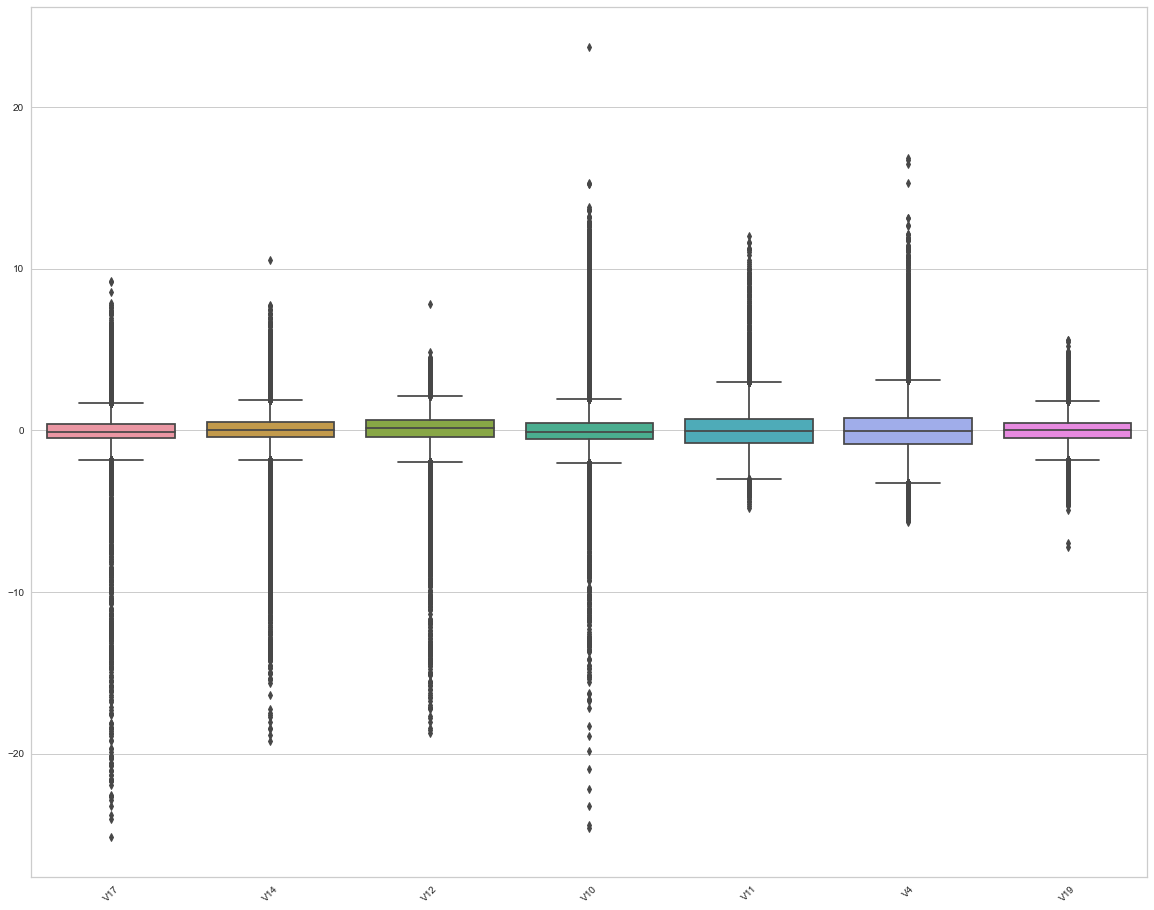

In [ ]:
plt.figure(figsize=(20,16))
sns.boxplot(data = new_df.loc[:,(new_df.columns != 'Amount')& (new_df.columns != 'Class')])
plt.xticks(rotation=45);

In [ ]:
df1 = new_df.copy()

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [378]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (198608, 30)
Train target shape   :  (198608,)
Test features shape  :  (85118, 30)
Test target shape    :  (85118,)


In [379]:
X1 = new_df.drop(['Class'], axis=1)
y1 = new_df['Class']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify=y1, test_size=0.3, random_state=42)
print("Train features shape : ", X_train1.shape)
print("Train target shape   : ", y_train1.shape)
print("Test features shape  : ", X_test1.shape)
print("Test target shape    : ", y_test1.shape)

Train features shape :  (198608, 8)
Train target shape   :  (198608,)
Test features shape  :  (85118, 8)
Test target shape    :  (85118,)


#### Scaling

In [380]:
# we don't scale data because we will scale with pipeline

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [381]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

***ii. Model Training***

In [382]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [383]:
operations = [("scaler", RobustScaler()), ("log", LogisticRegression(random_state=42))]
df_log_model = Pipeline(steps=operations)
new_df_log_model = Pipeline(steps=operations)

***iii. Prediction and Model Evaluating***


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

In [384]:
df_log_model.fit(X_train, y_train)
eval_metric(df_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[84961    15]
 [   61    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.57      0.68       142

    accuracy                           1.00     85118
   macro avg       0.92      0.79      0.84     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198248     29]
 [   120    211]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.88      0.64      0.74       331

    accuracy                           1.00    198608
   macro avg       0.94      0.82      0.87    198608
weighted avg       1.00      1.00      1.00    198608



In [385]:
new_df_log_model.fit(X_train1, y_train1)
eval_metric(new_df_log_model, X_train1, y_train1, X_test1, y_test1)

Test_Set
[[84961    15]
 [   67    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.83      0.53      0.65       142

    accuracy                           1.00     85118
   macro avg       0.92      0.76      0.82     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198246     31]
 [   134    197]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.86      0.60      0.70       331

    accuracy                           1.00    198608
   macro avg       0.93      0.80      0.85    198608
weighted avg       1.00      1.00      1.00    198608



***iv. Plot Precision and Recall Curve***


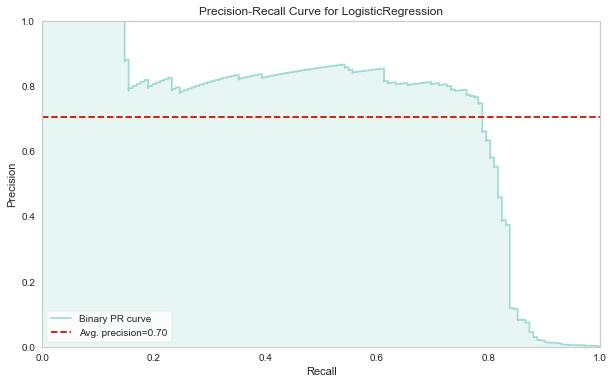

In [386]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", RobustScaler()), ("log", LogisticRegression(random_state=42))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model)
   
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

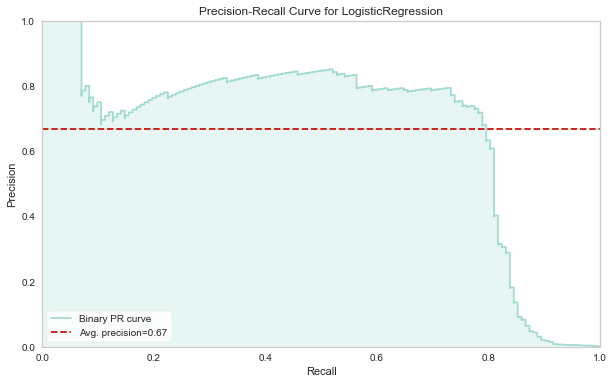

In [387]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", RobustScaler()), ("log", LogisticRegression(random_state=42))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model)
   
viz.fit(X_train1, y_train1)
viz.score(X_test1, y_test1)
viz.show();

***v. Apply and Plot StratifiedKFold***

In [ ]:
operations = [("scaler", RobustScaler()), ("log", LogisticRegression(random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.999
test_precision   0.867
test_recall      0.625
test_f1          0.723
test_roc_auc     0.977
dtype: float64

In [ ]:
operations = [("scaler", RobustScaler()), ("log", LogisticRegression(random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train1, y_train1, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.999
test_precision   0.854
test_recall      0.592
test_f1          0.695
test_roc_auc     0.976
dtype: float64

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [388]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [389]:
scaler = RobustScaler()

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)


### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [390]:
X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [391]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (79310, 30)
Train target shape   :  (79310,)
Test features shape  :  (33990, 30)
Test target shape    :  (33990,)


In [392]:
X1, y1 = pipeline.fit_resample(X1, y1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify = y1)

In [393]:
print("Train features shape : ", X_train1.shape)
print("Train target shape   : ", y_train1.shape)
print("Test features shape  : ", X_test1.shape)
print("Test target shape    : ", y_test1.shape)

Train features shape :  (79310, 8)
Train target shape   :  (79310,)
Test features shape  :  (33990, 8)
Test target shape    :  (33990,)


***ii. Model Training***

In [169]:
operations = [("scaler", RobustScaler()), ("log", LogisticRegression(random_state=42))]
df_log_model_smote = Pipeline(steps=operations)
new_df_log_model_smote = Pipeline(steps=operations)

***iii. Prediction and Model Evaluating***

In [ ]:
df_log_model_smote.fit(X_train, y_train)
eval_metric(df_log_model_smote, X_train, y_train, X_test, y_test)

Test_Set
[[16684   311]
 [ 1093 15902]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16995
           1       0.98      0.94      0.96     16995

    accuracy                           0.96     33990
   macro avg       0.96      0.96      0.96     33990
weighted avg       0.96      0.96      0.96     33990


Train_Set
[[38964   691]
 [ 2524 37131]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     39655
           1       0.98      0.94      0.96     39655

    accuracy                           0.96     79310
   macro avg       0.96      0.96      0.96     79310
weighted avg       0.96      0.96      0.96     79310



In [ ]:
new_df_log_model_smote.fit(X_train1, y_train1)
eval_metric(new_df_log_model_smote, X_train1, y_train1, X_test1, y_test1)

Test_Set
[[16611   384]
 [ 1391 15604]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     16995
           1       0.98      0.92      0.95     16995

    accuracy                           0.95     33990
   macro avg       0.95      0.95      0.95     33990
weighted avg       0.95      0.95      0.95     33990


Train_Set
[[38838   817]
 [ 3089 36566]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     39655
           1       0.98      0.92      0.95     39655

    accuracy                           0.95     79310
   macro avg       0.95      0.95      0.95     79310
weighted avg       0.95      0.95      0.95     79310



***iv.  Plot Precision and Recall Curve***


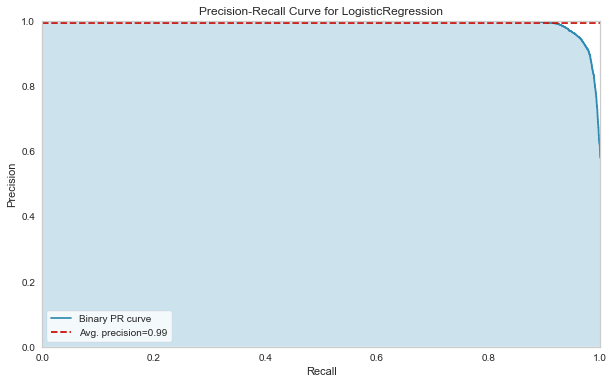

In [ ]:
operations = [("scaler", RobustScaler()), ("log", LogisticRegression(random_state=42))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model)
   
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

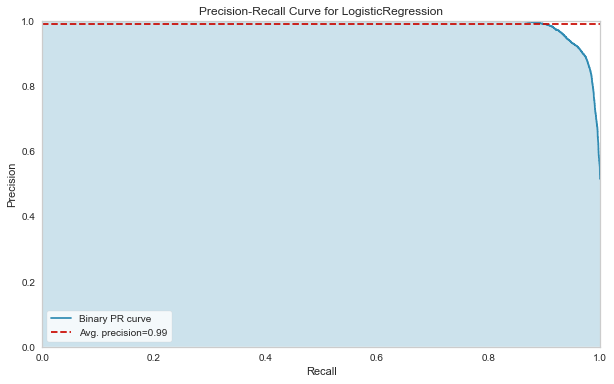

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", RobustScaler()), ("log", LogisticRegression(random_state=42))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model)
   
viz.fit(X_train1, y_train1)
viz.score(X_test1, y_test1)
viz.show();

***v. Apply and Plot StratifiedKFold***

In [ ]:
operations = [("scaler", RobustScaler()), ("log", LogisticRegression(random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.959
test_precision   0.981
test_recall      0.936
test_f1          0.958
test_roc_auc     0.992
dtype: float64

In [111]:
operations = [("scaler", RobustScaler()), ("log", LogisticRegression(random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train1, y_train1, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.951
test_precision   0.978
test_recall      0.922
test_f1          0.949
test_roc_auc     0.988
dtype: float64

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [129]:
df_rf_model=RandomForestClassifier(random_state=42)
df_rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [130]:
new_df_rf_model=RandomForestClassifier(random_state=42)
new_df_rf_model.fit(X_train1,y_train1)

RandomForestClassifier(random_state=42)

***ii. Prediction and Model Evaluating***

In [131]:
eval_metric(df_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[16979    16]
 [   17 16978]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16995
           1       1.00      1.00      1.00     16995

    accuracy                           1.00     33990
   macro avg       1.00      1.00      1.00     33990
weighted avg       1.00      1.00      1.00     33990


Train_Set
[[39655     0]
 [    0 39655]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39655
           1       1.00      1.00      1.00     39655

    accuracy                           1.00     79310
   macro avg       1.00      1.00      1.00     79310
weighted avg       1.00      1.00      1.00     79310



In [132]:
eval_metric(new_df_rf_model, X_train1, y_train1, X_test1, y_test1)

Test_Set
[[16956    39]
 [   55 16940]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16995
           1       1.00      1.00      1.00     16995

    accuracy                           1.00     33990
   macro avg       1.00      1.00      1.00     33990
weighted avg       1.00      1.00      1.00     33990


Train_Set
[[39655     0]
 [    0 39655]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39655
           1       1.00      1.00      1.00     39655

    accuracy                           1.00     79310
   macro avg       1.00      1.00      1.00     79310
weighted avg       1.00      1.00      1.00     79310



***iii. Plot Precision and Recall Curve***


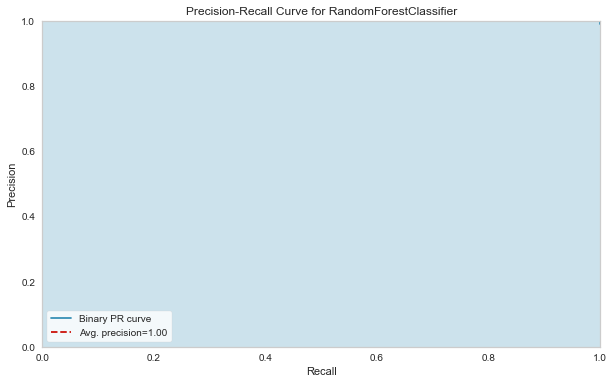

In [133]:
viz = PrecisionRecallCurve(
    df_rf_model)
   
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

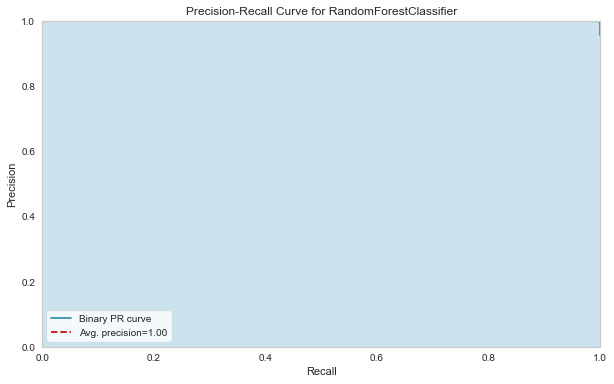

In [135]:
viz = PrecisionRecallCurve(
    new_df_rf_model)
   
viz.fit(X_train1, y_train1)
viz.score(X_test1, y_test1)
viz.show();

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

clf = RandomForestClassifier(random_state=0)

param_grid = {"max_depth": [3, None],
             "min_samples_split": [5, 10]}
search = HalvingGridSearchCV(clf, param_grid, resource='n_estimators',
                        max_resources=10,
                        random_state=0).fit(X_train1, y_train1)
search.best_params_  

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 9}

In [139]:
new_df_rf_model=RandomForestClassifier(max_depth=None, min_samples_split=5,n_estimators=9, random_state=42)
new_df_rf_model.fit(X_train1,y_train1)

RandomForestClassifier(min_samples_split=5, n_estimators=9, random_state=42)

In [140]:
eval_metric(new_df_rf_model, X_train1, y_train1, X_test1, y_test1)

Test_Set
[[16926    69]
 [   84 16911]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16995
           1       1.00      1.00      1.00     16995

    accuracy                           1.00     33990
   macro avg       1.00      1.00      1.00     33990
weighted avg       1.00      1.00      1.00     33990


Train_Set
[[39647     8]
 [   18 39637]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39655
           1       1.00      1.00      1.00     39655

    accuracy                           1.00     79310
   macro avg       1.00      1.00      1.00     79310
weighted avg       1.00      1.00      1.00     79310



***iv. Apply and Plot StratifiedKFold***

In [141]:
model = RandomForestClassifier(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.999
test_precision   0.999
test_recall      0.999
test_f1          0.999
test_roc_auc     1.000
dtype: float64

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [163]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

***ii. Define Model***

In [188]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 3)
model.fit(X_train, y_train, validation_split = 0.1, batch_size = 32, epochs = 15, verbose = 1,callbacks = [early_stop])

Epoch 1/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0940 - accuracy: 0.9665 - val_loss: 0.0449 - val_accuracy: 0.9837
Epoch 2/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0341 - accuracy: 0.9885 - val_loss: 0.0269 - val_accuracy: 0.9902
Epoch 3/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0177 - val_accuracy: 0.9947
Epoch 4/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0149 - val_accuracy: 0.9953
Epoch 5/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0112 - val_accuracy: 0.9966
Epoch 6/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.0101 - val_accuracy: 0.9976
Epoch 7/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.0120 - val_accuracy:

***v. Prediction and Model Evaluating***

In [192]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred_train = (model.predict(X_train) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("\033[1m---------------------Train Scores---------------------\033[0m")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

---------------------Test Scores---------------------
[[16940    55]
 [    8 16987]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16995
           1       1.00      1.00      1.00     16995

    accuracy                           1.00     33990
   macro avg       1.00      1.00      1.00     33990
weighted avg       1.00      1.00      1.00     33990

---------------------Train Scores---------------------
[[39583    72]
 [   10 39645]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39655
           1       1.00      1.00      1.00     39655

    accuracy                           1.00     79310
   macro avg       1.00      1.00      1.00     79310
weighted avg       1.00      1.00      1.00     79310



for X1  new_df

In [193]:
scaler = RobustScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [199]:
model1 = Sequential()

model1.add(Dense(30, activation = "relu"))
model1.add(Dense(15, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))

model1.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 3)
model1.fit(X_train1, y_train1, validation_split = 0.1, batch_size = 32, epochs = 15, verbose = 1,callbacks = [early_stop])

Epoch 1/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.1316 - accuracy: 0.9508 - val_loss: 0.0981 - val_accuracy: 0.9620
Epoch 2/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.1018 - accuracy: 0.9588 - val_loss: 0.0886 - val_accuracy: 0.9652
Epoch 3/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0923 - accuracy: 0.9625 - val_loss: 0.0833 - val_accuracy: 0.9678
Epoch 4/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9661 - val_loss: 0.0775 - val_accuracy: 0.9673
Epoch 5/15
2231/2231 [==============================] - 3s 2ms/step - loss: 0.0807 - accuracy: 0.9681 - val_loss: 0.0749 - val_accuracy: 0.9691
Epoch 6/15
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0772 - accuracy: 0.9687 - val_loss: 0.0714 - val_accuracy: 0.9709
Epoch 7/15
2231/2231 [==============================] - 3s 2ms/step - loss: 0.0737 - accuracy: 0.9704 - val_loss: 0.0689 - val_accuracy:

***vi. Plot Precision and Recall Curve***

<AxesSubplot:>

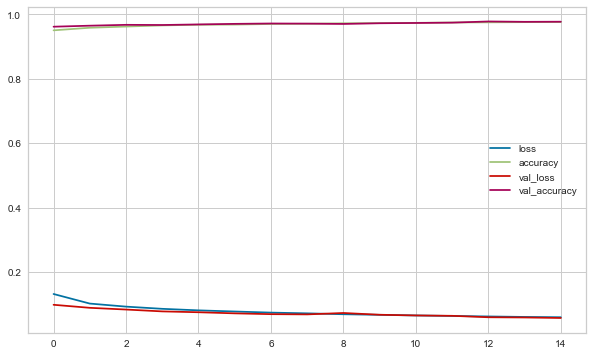

In [200]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.plot()

In [204]:
y_pred = (model1.predict(X_test1) > 0.5).astype("int32")
y_pred_train = (model1.predict(X_train1) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print("\033[1m---------------------Train Scores---------------------\033[0m")
print(confusion_matrix(y_train1, y_pred_train))
print(classification_report(y_train1, y_pred_train))

---------------------Test Scores---------------------
[[16710   285]
 [  554 16441]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16995
           1       0.98      0.97      0.98     16995

    accuracy                           0.98     33990
   macro avg       0.98      0.98      0.98     33990
weighted avg       0.98      0.98      0.98     33990

---------------------Train Scores---------------------
[[38962   693]
 [ 1158 38497]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     39655
           1       0.98      0.97      0.98     39655

    accuracy                           0.98     79310
   macro avg       0.98      0.98      0.98     79310
weighted avg       0.98      0.98      0.98     79310



**Scores**

In [205]:
loss, accuracy = model1.evaluate(X_test1, y_test1, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.05998297408223152
accuracy :  0.9753162860870361


## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Flask API.

### Save and Export the Model as .pkl


In [207]:
final_scaler = RobustScaler()
final_scaler.fit(X1)

RobustScaler()

In [208]:
model1 = Sequential()

model1.add(Dense(30, activation = "relu"))
model1.add(Dense(15, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))

model1.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 3)
model1.fit(X1, y1, validation_split = 0.1, batch_size = 32, epochs = 15, verbose = 1,callbacks = [early_stop])


Epoch 1/15
3187/3187 [==============================] - 6s 2ms/step - loss: 0.1846 - accuracy: 0.9457 - val_loss: 0.2695 - val_accuracy: 0.9232
Epoch 2/15
3187/3187 [==============================] - 5s 2ms/step - loss: 0.1483 - accuracy: 0.9615 - val_loss: 0.1013 - val_accuracy: 0.9537
Epoch 3/15
3187/3187 [==============================] - 5s 2ms/step - loss: 0.1175 - accuracy: 0.9671 - val_loss: 0.0680 - val_accuracy: 0.9703
Epoch 4/15
3187/3187 [==============================] - 5s 2ms/step - loss: 0.0887 - accuracy: 0.9704 - val_loss: 0.0706 - val_accuracy: 0.9703
Epoch 5/15
3187/3187 [==============================] - 5s 2ms/step - loss: 0.0811 - accuracy: 0.9738 - val_loss: 0.1030 - val_accuracy: 0.9601
Epoch 6/15
3187/3187 [==============================] - 5s 2ms/step - loss: 0.0727 - accuracy: 0.9760 - val_loss: 0.0815 - val_accuracy: 0.9676
Epoch 6: early stopping


In [209]:
y_pred = (model1.predict(X1) > 0.5).astype("int32")
print("\033[1m---------------------Scores---------------------\033[0m")
print(confusion_matrix(y1, y_pred))
print(classification_report(y1, y_pred))


---------------------Scores---------------------
[[55832   818]
 [ 1796 54854]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56650
           1       0.99      0.97      0.98     56650

    accuracy                           0.98    113300
   macro avg       0.98      0.98      0.98    113300
weighted avg       0.98      0.98      0.98    113300



**Save Model** 

In [230]:
import pickle
pickle.dump(final_scaler, open('final_scaler', 'wb'))

In [232]:
model1.save('final_model.h5')

**Loading Model**

In [233]:
from tensorflow.keras.models import load_model

In [234]:
final_model = load_model('final_model.h5')

final_scaler = pickle.load(open("final_scaler", "rb"))

**Prediction**

In [235]:
random_ten_sample= df1.drop('Class', axis = 1).sample(n=10, random_state=101).iloc[0:10, :]

random_ten_sample

,V17,V14,V12,V10,V11,V4,V19,Amount
245893,-0.609,0.612,0.596,0.266,0.535,0.233,0.562,1.290
166133,-0.198,0.383,0.764,0.181,-0.887,1.457,-0.239,120.380
200032,-0.965,-0.317,-0.698,1.678,-1.413,-1.038,0.144,0.890
25523,-0.460,-0.562,0.573,0.459,-0.828,2.723,-0.853,25.800
142218,-0.314,-0.172,0.291,-1.592,-0.950,-1.856,-0.331,1.000
49357,0.142,-0.337,-1.264,1.347,-1.223,-1.396,0.026,177.700
70731,-0.001,1.256,0.146,0.144,0.739,0.749,0.441,3.110
80554,0.988,0.297,1.617,-0.372,2.019,0.775,-1.148,333.970
4262,0.734,1.523,-3.303,-0.100,1.602,-1.455,0.868,19.650
250659,1.153,-0.620,0.247,-1.324,0.234,0.726,1.493,224.360


In [ ]:
random_ten_sample = final_scaler.transform(random_ten_sample)

random_ten_sample

In [236]:
prediction = pd.DataFrame(final_model.predict(random_ten_sample) > 0.5, columns=['prediction']).astype("int32")
prediction

,prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [254]:
actual = pd.DataFrame(df1.sample(n=10, random_state=101)["Class"]).rename({'Class': 'actual'}, axis=1).astype("int32")
actual 

,actual
245893,0
166133,0
200032,0
25523,0
142218,0
49357,0
70731,0
80554,0
4262,0
250659,0


In [255]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

,actual,prediction
245893,0,0
166133,0,0
200032,0,0
25523,0,0
142218,0,0
49357,0,0
70731,0,0
80554,0,0
4262,0,0
250659,0,0


In [256]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "Correct Pred" if int(x['actual'] == x['prediction']) else "Wrong Pred", axis=1)

pred_df

,actual,prediction,prediction_accuracy
245893,0,0,Correct Pred
166133,0,0,Correct Pred
200032,0,0,Correct Pred
25523,0,0,Correct Pred
142218,0,0,Correct Pred
49357,0,0,Correct Pred
70731,0,0,Correct Pred
80554,0,0,Correct Pred
4262,0,0,Correct Pred
250659,0,0,Correct Pred


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___